### Problem statement(company data)

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [122]:
# import some data to play with
df1 = pd.read_csv('D:\\Assignment\\Decision_tree_assign\\Company_Data.csv')

In [124]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [1]:
pwd

'C:\\Users\\neeraj.shukla'

In [125]:
##Checking for maximum and minimum values to decide what will be the cut off point
df1["Sales"].min()
df1["Sales"].max()
df1["Sales"].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

In [127]:
np.median(df1["Sales"])

7.49

In [128]:
df1["sales"]= "<=7.49"

In [129]:
df1.loc[df1["Sales"]>=7.49,"sales"]=">=7.49"

In [130]:
df1.sales

0      >=7.49
1      >=7.49
2      >=7.49
3      <=7.49
4      <=7.49
        ...  
395    >=7.49
396    <=7.49
397    <=7.49
398    <=7.49
399    >=7.49
Name: sales, Length: 400, dtype: object

In [131]:
df1["sales"].unique()
df1["sales"].value_counts()

>=7.49    201
<=7.49    199
Name: sales, dtype: int64

In [ ]:
##Dropping Sales column from the data 
df1.drop(["Sales"],axis=1,inplace = True)

In [135]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [116]:
## Company data has no null values
df1.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [142]:
df1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [143]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df1['ShelveLoc']= label_encoder.fit_transform(df1['ShelveLoc']) 
df1['Urban']= label_encoder.fit_transform(df1['Urban']) 
df1['US']= label_encoder.fit_transform(df1['US']) 
df1['sales']= label_encoder.fit_transform(df1['sales']) 

In [144]:
df1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


In [145]:
x = df2.iloc[:,0:10] 
y = df2.iloc[:,10]

In [147]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,0,0
1,111,48,16,260,83,65,10,0,1,0
2,113,35,10,269,80,59,12,0,0,1
3,117,100,4,466,97,55,14,0,0,1
4,141,64,3,340,128,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0
396,139,23,3,37,120,55,11,0,0,1
397,162,26,12,368,159,40,18,0,0,1
398,100,79,7,284,95,50,12,1,0,0


In [149]:
##Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)


In [150]:
y_train.value_counts()
y_test.value_counts()

0    57
1    23
Name: Urban_No, dtype: int64

In [151]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

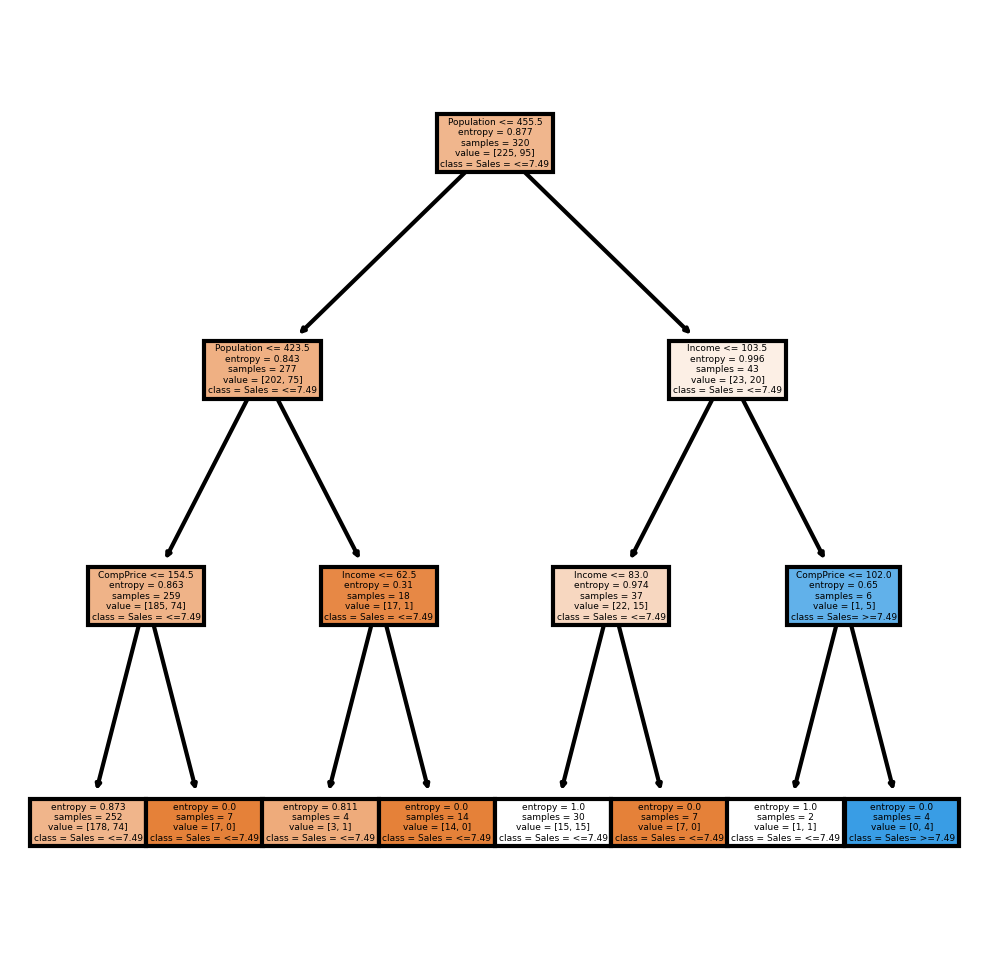

In [153]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Sales = <=7.49', 'Sales= >=7.49']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);